<a href="https://colab.research.google.com/github/kelseypeltz/Black-Jack-Project/blob/main/Milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ![image](https://user-images.githubusercontent.com/69976409/195754514-06dcba6c-7ea4-42da-a3d8-8f334194c1f8.png)
# Blackjack Project
Approach to Blackjack by Jack Johnson & Kelsey Peltz
<details open="open">
<summary>Table of Contents</summary>

- [The Game](#the-game)
- [Project Goals](#project-goals)
  - [Collaboration Plan](#collaboration-plan)
- [ETL](#etl)
 - [Dataset 1](#dataset-1)
 - [Datasets 2](#datasets-2)
   
   

---   

## The Game
Blackjack is the most popular casino banking game in the world. In blackjack, there is one deck of 52 cards, everyone plays against the dealer, players place bets, and each player is dealt two cards at a time (including the dealer). The players know one of the dealer's cards, while the other remains unknown until the round is done. After everyone is dealt, players can decide if they want to "hit," meaning they'd be dealt more cards (one at a time) to get a sum closest to 21 without "busting" (going over 21). If a player is satisfied with their hand, they do not "hit." The goal is to have a sum greater than the dealers.1 Players and dealers often use card counting as away to become an advantaged player. Card counting is a mathematical strategy used in blackjack that helps determine one’s probable advantage or disadvantage of the next dealt card. 

## Project Goals

The goal of this project is to determine the best mathematical strategy to become an advantaged player in blackjack. 
## Collaboration Plan 

We have set up a google colab to work on our code together. Since we are partnering this project with our Capstone project, we plan on meeting on a weekly to bi-weekly schedule our faculty mentor. We plan on dividing work by doing independent research and coding and discussing it during our scheduled meetings and throughout the week as needed. 

## ETL 
### (Extract, Transform, and Load)
Currently we are coding a blackjack simulation that will run the game thousands of times using different strategies since the data source we had been hoping to use was too large for github. We are hoping to somehow upload the data from [here](https://www.kaggle.com/datasets/mojocolors/900000-hands-of-blackjack-results) to get more insights the average player. In the meantime, we found a smaller dataset to begin analyzing. We also compiled  to help us understand blackjack basic strategy (a.k.a. the book) and the "typical" human strategy so we can compare those with the counting card strategies.  

#### **Dataset 1**
This first dataset we are using was found in the article [The Statistics of Blackjack](https://towardsdatascience.com/the-statistics-of-blackjack-e3b5fc29e67d) but was original sourced from [this Github](https://gist.github.com/ArnaudBu/797094581de3f6703a6c12b994da18c6). As you can see the dataset is limited. It runs through each potential play (stand, hit, double) with various potential score combination of player and dealer. We can see that the majority of players seem as though they are winning because they have a higher score (244 having a higher score, 45 lower, and 11 equal). This is because we do not know the other card the dealer has or the dealer's next move. While this data is a good start, we believe that the addition of our card counting data with final outcomes will add immensely to this project.
Question: How will this data change the more players there are on the table?

In [ ]:
import pandas as pd
import numpy as np
strategy_df = pd.read_csv('blackjack_strategies.csv')
strategy_df.head()

,score,score_dealer,hard,decision,earn,earn_if_stand,earn_if_double,earn_if_hit,should_split
0,20,11,True,stand,0.105197,0.105197,-1.752715,-0.876357,False
1,20,10,True,stand,0.436742,0.436742,-1.709090,-0.854545,False
2,20,9,True,stand,0.759325,0.759325,-1.701164,-0.850582,False
3,20,8,True,stand,0.793192,0.793192,-1.702979,-0.851489,False
4,20,7,True,stand,0.773226,0.773226,-1.700020,-0.850010,True


In [ ]:
strategy_df['equation'] = strategy_df.score - strategy_df.score_dealer
strategy_df.loc[strategy_df['equation']<0, 'Outcome'] = 'Lower with known info'
strategy_df.loc[strategy_df['equation']>0, 'Outcome'] = 'Higher with known info'
strategy_df.loc[strategy_df['equation']==0, 'Outcome'] = 'Equal with known info'
strategy_df.Outcome.value_counts()

Higher with known info    244
Lower with known info      45
Equal with known info      11
Name: Outcome, dtype: int64

In the plot below, you can see that more players who scored below 16 were in the negatives for earnings than players above 16. This is likely due to the unknown dealer's card and/or next move getting them closer to 21. 

sixteen
above    AxesSubplot(0.125,0.125;0.775x0.755)
below    AxesSubplot(0.125,0.125;0.775x0.755)
Name: earn, dtype: object

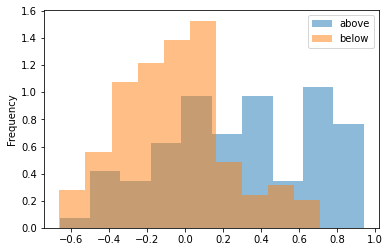

In [ ]:
strategy_df.loc[strategy_df['score']<=16, 'sixteen'] = 'below'
strategy_df.loc[strategy_df['score']>16, 'sixteen'] = 'above'
strategy_df.groupby('sixteen').earn.plot.hist(alpha=0.5, density=True, legend=True)

In the chart below we can see that players who had scores above the dealer's are pretty evenly spread out between negative and positive earnings. Players with equal and lower scores are mostly in the negatives with a few exceptions (due to busts). 

Outcome
Equal with known info     AxesSubplot(0.125,0.125;0.775x0.755)
Higher with known info    AxesSubplot(0.125,0.125;0.775x0.755)
Lower with known info     AxesSubplot(0.125,0.125;0.775x0.755)
Name: earn, dtype: object

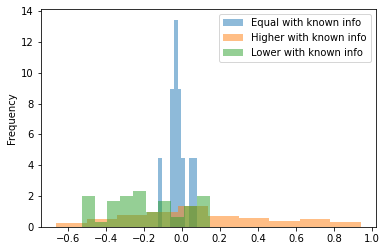

In [ ]:
strategy_df.groupby('Outcome').earn.plot.hist(alpha=0.5, density=True, legend=True)

#### **Datasets 2**

These data sets show what the basic, intuitive and slightly more advanced strategies suggests players due based on their hand. These strategies do not follow the counting card methods we will compare them too. We will use these strategies as a kind of control variable to see how much of a difference there is compared to counting card methods. From our research, the basic strategy produce a 42% win rate. Our goal is to find a combination of strategies that will produce a 50% or more win rate. 
Question: How big of a difference will card counting add to the winning outcomes compared to these strategies? 



Used more advanced strategy: 

In [ ]:
s_df = pd.read_csv('Strategy.csv')
s_df.head()

,Unnamed: 0,2,3,4,5,6,7,8,9,10,A
0,21.0,S,S,S,S,S,S,S,S,S,S
1,20.0,S,S,S,S,S,S,S,S,S,S
2,19.0,S,S,S,S,S,S,S,S,S,S
3,18.0,S,S,S,S,S,S,S,S,S,S
4,17.0,S,S,S,S,S,S,S,S,S,S


Uses normal, human intuition:

In [ ]:
human_df = pd.read_csv('Strategy_human.csv')
human_df.head()

,Unnamed: 0,2,3,4,5,6,7,8,9,10,A
0,17,S,S,S,S,S,S,S,S,S,S
1,16,S,S,S,S,S,H,H,Sr,Sr,H
2,15,S,S,S,S,S,H,H,H,Sr,H
3,14,S,S,S,S,S,H,H,H,H,H
4,13,S,S,S,S,S,H,H,H,H,H


Uses basic (by the book) strategy:

In [ ]:
basic_df = pd.read_csv('basicStrategy.csv')
basic_df.head()

,Unnamed: 0,2,3,4,5,6,7,8,9,10,A
0,17,S,S,S,S,S,S,S,S,S,S
1,16,S,S,S,S,S,H,H,Sr,Sr,H
2,15,S,S,S,S,S,H,H,H,Sr,H
3,14,S,S,S,S,S,H,H,H,H,H
4,13,S,S,S,S,S,H,H,H,H,H


In [ ]:
stands_df = pd.read_csv('always_stand.csv')
stands_df.head()

,0,2,3,4,5,6,7,8,9,10,A
0,21,S,S,S,S,S,S,S,S,S,S
1,20,S,S,S,S,S,S,S,S,S,S
2,19,S,S,S,S,S,S,S,S,S,S
3,18,S,S,S,S,S,S,S,S,S,S
4,17,S,S,S,S,S,S,S,S,S,S


Always hits:

In [ ]:
hits_df = pd.read_csv('always_hit.csv')
hits_df.head()

,0,2,3,4,5,6,7,8,9,10,A
0,21,H,H,H,H,H,H,H,H,H,H
1,20,H,H,H,H,H,H,H,H,H,H
2,19,H,H,H,H,H,H,H,H,H,H
3,18,H,H,H,H,H,H,H,H,H,H
4,17,H,H,H,H,H,H,H,H,H,H


Always hits under 17:

In [ ]:
hit17_df = pd.read_csv('hit_straight_under_17.csv')
hit17_df.head()

,0,2,3,4,5,6,7,8,9,10,A
0,21,S,S,S,S,S,S,S,S,S,S
1,20,S,S,S,S,S,S,S,S,S,S
2,19,S,S,S,S,S,S,S,S,S,S
3,18,S,S,S,S,S,S,S,S,S,S
4,17,S,S,S,S,S,S,S,S,S,S


Always stands on 16 and above: 

In [ ]:
stand16_df = pd.read_csv('stand_on_16.csv')
stand16_df.head()

,0,2,3,4,5,6,7,8,9,10,A
0,21,S,S,S,S,S,S,S,S,S,S
1,20,S,S,S,S,S,S,S,S,S,S
2,19,S,S,S,S,S,S,S,S,S,S
3,18,S,S,S,S,S,S,S,S,S,S
4,17,S,S,S,S,S,S,S,S,S,S
